Plot the execution latency encoding latency and decoding latency by layer

Straggler=1,Failure=1

In [41]:
# vgg16
# Results of single method:
# 'uncoded': {'min':14.868264198303223, 'mean':15.017139911651611, 'max':15.453481674194336}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded': {'min':11.098850727081299, 'mean':11.464923787117005, 'max':12.77589464187622}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# Results of mixed method:
# Layer 0: [1.13273673 1.20794725]
# Layer 1: [2.56091862 2.63830898]
# Layer 3: [0.91961403 0.85910132]
# Layer 4: [1.70971303 1.32600513]
# Layer 6: [0.6748003 0.5052011]
# Layer 7: [1.31045156 0.87710204]
# Layer 8: [1.30710235 0.90000038]
# Layer 10: [0.59670818 0.39700165]
# Layer 11: [1.51521051 1.01889288]
# Layer 12: [1.53252351 1.08900459]
# Layer 14: [0.84360197 0.50520818]
# Layer 15: [0.84340591 0.5011059 ]
# Layer 16: [0.85829926 0.50320094]
# Conv latency: [0.319610595703125, 2.560918617248535, 0.8591013193130493, 1.3260051250457763, 0.5052011013031006, 0.8771020412445069, 0.9000003814697266, 0.39700164794921877, 1.0188928842544556, 1.0890045881271362, 0.5052081823349, 0.5011059045791626, 0.5032009363174439]
# Hybrid minimum of mean layer latency: 11.38753342628479

# results: vgg16
# layer 1, encoding <= 0.1939244270324707, decoding <= 0.1387157440185547
# layer 3, encoding <= 0.048238515853881836, decoding <= 0.07011079788208008
# layer 4, encoding <= 0.10098123550415039, decoding <= 0.0594639778137207
# layer 6, encoding <= 0.024212360382080078, decoding <= 0.026593923568725586
# layer 7, encoding <= 0.05275583267211914, decoding <= 0.0278933048248291
# layer 8, encoding <= 0.054300546646118164, decoding <= 0.02733302116394043
# layer 10, encoding <= 0.014374494552612305, decoding <= 0.014009237289428711
# layer 11, encoding <= 0.03171944618225098, decoding <= 0.013364553451538086
# layer 12, encoding <= 0.03244733810424805, decoding <= 0.013276100158691406
# layer 14, encoding <= 0.010057926177978516, decoding <= 0.0017583370208740234
# layer 15, encoding <= 0.009286880493164062, decoding <= 0.0017132759094238281
# layer 16, encoding <= 0.009629011154174805, decoding <= 0.0017194747924804688
# Sum: 0.9778797626495361

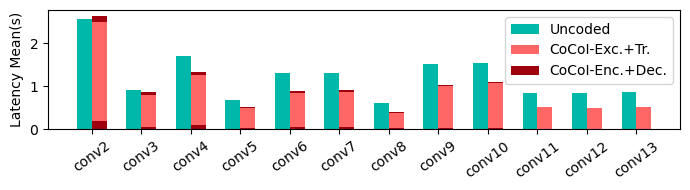

In [42]:
# Plot the uncoded latency and coded encoding, execution, decoding latency by layer

import matplotlib.pyplot as plt
import numpy as np

figure_size = (7,2)
width = 0.3

x_labels_vgg16 = ['conv2','conv3','conv4','conv5','conv6','conv7','conv8','conv9','conv10','conv11','conv12','conv13']
# distributed_conv_idxes_vgg16 = range()
legends = ['Uncoded', 'CoCoI-Exc.+Tr.', 'CoCoI-Enc.+Dec.']

vgg16_datas = np.asarray([[1.13273673, 1.20794725],
                [2.56091862,2.63830898],
                [0.91961403,0.85910132],
                [1.70971303,1.32600513],
                [0.6748003,0.5052011],
                [1.31045156,0.87710204],
                [1.30710235,0.90000038],
                [0.59670818,0.39700165],
                [1.51521051,1.01889288],
                [1.53252351,1.08900459],
                [0.84360197,0.50520818],
                [0.84340591,0.5011059 ],
                [0.85829926,0.50320094]])
vgg16_distributed_conv = vgg16_datas[1:]
vgg16_uncoded = vgg16_distributed_conv[:, 0]
vgg16_coded = vgg16_distributed_conv[:, 1]

vgg16_encoding_decoding = np.asarray([[0.1939244270324707, 0.1387157440185547],
                [0.048238515853881836, 0.07011079788208008],
                [0.10098123550415039, 0.0594639778137207],
                [0.024212360382080078, 0.026593923568725586],
                [0.05275583267211914, 0.0278933048248291],
                [0.054300546646118164, 0.02733302116394043],
                [0.014374494552612305, 0.014009237289428711],
                [0.03171944618225098, 0.013364553451538086],
                [0.03244733810424805, 0.013276100158691406],
                [0.010057926177978516, 0.0017583370208740234],
                [0.009286880493164062, 0.0017132759094238281],
                [0.009629011154174805, 0.0017194747924804688]])
vgg16_encoding = vgg16_encoding_decoding[:, 0]
vgg16_decoding = vgg16_encoding_decoding[:, 1]

xs = np.arange(len(x_labels_vgg16))

plt.figure(figsize=figure_size)
colors = ['#9e000d', '#00b8a9', '#FF6666']  # only for distributed methods except local
plt.bar(xs-width/2, vgg16_uncoded, width=width, label=legends[0], color=colors[-2])
plt.bar(xs+width/2, vgg16_coded-vgg16_encoding-vgg16_decoding, width=width, bottom=vgg16_encoding, label=legends[1], color=colors[-1])
plt.bar(xs+width/2, vgg16_encoding, width=width, label=legends[2], color=colors[0])
plt.bar(xs+width/2, vgg16_decoding, width=width, bottom=vgg16_coded-vgg16_decoding, color=colors[0])
plt.xticks(xs, x_labels_vgg16, rotation=36)
plt.ylabel('Latency Mean(s)')
plt.legend()
plt.tight_layout()



In [43]:
# resnet

# Results of single method:
# 'uncoded': {'min':28.557711839675903, 'mean':28.857059741020198, 'max':29.775869607925415}
# Distributed conv idxes: [3, 6, 10, 13, 17, 20, 26, 29, 33, 36, 42, 45, 49, 52, 54, 58, 61]
# 'coded': {'min':23.70189619064331, 'mean':24.7959210395813, 'max':28.500851154327393}
# Distributed conv idxes: [3, 6, 10, 13, 17, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# Results of mixed method:
# Layer 0: [1.1443171  1.29582036]
# Layer 3: [2.55684464 2.60583491]
# Layer 6: [2.49939339 2.59448781]
# Layer 10: [2.49910843 2.58693042]
# Layer 13: [2.54460948 2.66113398]
# Layer 17: [1.87991018 1.71662049]
# Layer 20: [1.71760993 1.25840433]
# Layer 22: [1.41921902 1.50939686]
# Layer 26: [1.70061131 1.23250303]
# Layer 29: [1.69960673 1.23430281]
# Layer 33: [1.04785931 0.94430182]
# Layer 36: [1.29930706 0.84390137]
# Layer 38: [0.59599907 0.69769969]
# Layer 42: [1.30730121 0.84930127]
# Layer 45: [1.30089958 0.86269982]
# Layer 49: [0.72771626 0.71400201]
# Layer 52: [1.51202819 1.08530371]
# Layer 54: [0.23255064 0.31720021]
# Layer 58: [1.51760151 0.99209998]
# Layer 61: [1.51640887 0.99920006]
# Conv latency: [0.31938815116882324, 2.556844639778137, 2.4993933916091917, 2.4991084337234497, 2.544609475135803, 1.7166204929351807, 1.2584043264389038, 0.3371391296386719, 1.2325030326843263, 1.234302806854248, 0.9443018198013305, 0.8439013719558716, 0.3606750965118408, 0.8493012666702271, 0.862699818611145, 0.7140020132064819, 1.0853037118911744, 0.23255064487457275, 0.9920999765396118, 0.9992000579833984]
# Hybrid minimum of mean layer latency: 24.36284029483795

# results: resnet18
# layer 3, encoding <= 0.19541239738464355, decoding <= 0.1440725326538086
# layer 6, encoding <= 0.1841726303100586, decoding <= 0.12380719184875488
# layer 10, encoding <= 0.1777801513671875, decoding <= 0.12211871147155762
# layer 13, encoding <= 0.162153959274292, decoding <= 0.13036561012268066
# layer 17, encoding <= 0.17209672927856445, decoding <= 0.06150937080383301
# layer 20, encoding <= 0.09166383743286133, decoding <= 0.06620597839355469
# layer 26, encoding <= 0.09173202514648438, decoding <= 0.062088727951049805
# layer 29, encoding <= 0.09100151062011719, decoding <= 0.06381964683532715
# layer 33, encoding <= 0.09145045280456543, decoding <= 0.027771472930908203
# layer 36, encoding <= 0.05123639106750488, decoding <= 0.027301788330078125
# layer 42, encoding <= 0.052800655364990234, decoding <= 0.02670121192932129
# layer 45, encoding <= 0.05015850067138672, decoding <= 0.028212785720825195
# layer 49, encoding <= 0.04482436180114746, decoding <= 0.013255834579467773
# layer 52, encoding <= 0.032584190368652344, decoding <= 0.013527393341064453
# layer 58, encoding <= 0.033128976821899414, decoding <= 0.013389110565185547
# layer 61, encoding <= 0.03242778778076172, decoding <= 0.013411760330200195
# Sum: 2.4921836853027344


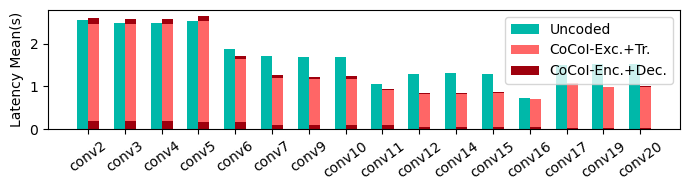

In [44]:
x_labels_resnet18 = ['conv2','conv3','conv4','conv5','conv6','conv7','conv9','conv10','conv11','conv12','conv14','conv15','conv16','conv17','conv19','conv20']
distributed_conv_idxes_resnet18 = [1,2,3,4,5,6,8,9,10,11,13,14,15,16,18,19]

resnet18_datas = np.asarray([[1.1443171, 1.29582036],
                    [2.55684464, 2.60583491],
                    [2.49939339, 2.59448781],
                    [2.49910843, 2.58693042],
                    [2.54460948, 2.66113398],
                    [1.87991018, 1.71662049],
                    [1.71760993, 1.25840433],
                    [1.41921902, 1.50939686],
                    [1.70061131, 1.23250303],
                    [1.69960673, 1.23430281],
                    [1.04785931, 0.94430182],
                    [1.29930706, 0.84390137],
                    [0.59599907, 0.69769969],
                    [1.30730121, 0.84930127],
                    [1.30089958, 0.86269982],
                    [0.72771626, 0.71400201],
                    [1.51202819, 1.08530371],
                    [0.23255064, 0.31720021],
                    [1.51760151, 0.99209998],
                    [1.51640887, 0.99920006]])
resnet18_distributed_conv = resnet18_datas[distributed_conv_idxes_resnet18]
# print(resnet18_distributed_conv)
resnet18_uncoded = resnet18_distributed_conv[:, 0]
resnet18_coded = resnet18_distributed_conv[:, 1]

resnet18_encoding_decoding = np.asarray([[0.19541239738464355, 0.1440725326538086],
                                [0.1841726303100586, 0.12380719184875488],
                                [0.1777801513671875, 0.12211871147155762],
                                [0.162153959274292, 0.13036561012268066],
                                [0.17209672927856445, 0.06150937080383301],
                                [0.09166383743286133, 0.06620597839355469],
                                [0.09173202514648438, 0.062088727951049805],
                                [0.09100151062011719, 0.06381964683532715],
                                [0.09145045280456543, 0.027771472930908203],
                                [0.05123639106750488, 0.027301788330078125],
                                [0.052800655364990234, 0.02670121192932129],
                                [0.05015850067138672, 0.028212785720825195],
                                [0.04482436180114746, 0.013255834579467773],
                                [0.032584190368652344, 0.013527393341064453],
                                [0.033128976821899414, 0.013389110565185547],
                                [0.03242778778076172, 0.013411760330200195]])
resnet18_encoding = resnet18_encoding_decoding[:, 0]
resnet18_decoding = resnet18_encoding_decoding[:, 1]

xs = np.arange(len(x_labels_resnet18))

plt.figure(figsize=figure_size)
plt.bar(xs-width/2, resnet18_uncoded, width=width, label=legends[0], color=colors[-2])
plt.bar(xs+width/2, resnet18_coded-resnet18_encoding-resnet18_decoding, width=width, bottom=resnet18_encoding, label=legends[1], color=colors[-1])
plt.bar(xs+width/2, resnet18_encoding, width=width, label=legends[2], color=colors[0])
plt.bar(xs+width/2, resnet18_decoding, width=width, bottom=resnet18_coded-resnet18_decoding, color=colors[0])
plt.xticks(xs, x_labels_resnet18, rotation=36)
plt.ylabel('Latency Mean(s)')
plt.legend()
plt.tight_layout()

# results: resnet18
# layer 3, encoding <= 0.19541239738464355, decoding <= 0.1440725326538086
# layer 6, encoding <= 0.1841726303100586, decoding <= 0.12380719184875488
# layer 10, encoding <= 0.1777801513671875, decoding <= 0.12211871147155762
# layer 13, encoding <= 0.162153959274292, decoding <= 0.13036561012268066
# layer 17, encoding <= 0.17209672927856445, decoding <= 0.06150937080383301
# layer 20, encoding <= 0.09166383743286133, decoding <= 0.06620597839355469
# layer 26, encoding <= 0.09173202514648438, decoding <= 0.062088727951049805
# layer 29, encoding <= 0.09100151062011719, decoding <= 0.06381964683532715
# layer 33, encoding <= 0.09145045280456543, decoding <= 0.027771472930908203
# layer 36, encoding <= 0.05123639106750488, decoding <= 0.027301788330078125
# layer 42, encoding <= 0.052800655364990234, decoding <= 0.02670121192932129
# layer 45, encoding <= 0.05015850067138672, decoding <= 0.028212785720825195
# layer 49, encoding <= 0.04482436180114746, decoding <= 0.013255834579467773
# layer 52, encoding <= 0.032584190368652344, decoding <= 0.013527393341064453
# layer 58, encoding <= 0.033128976821899414, decoding <= 0.013389110565185547
# layer 61, encoding <= 0.03242778778076172, decoding <= 0.013411760330200195
# Sum: 2.4921836853027344


Failure=2

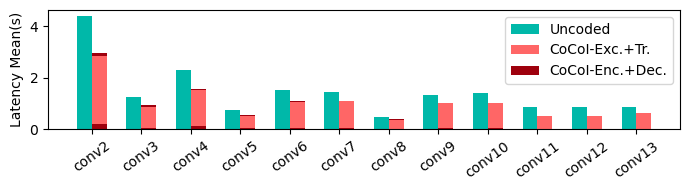

In [45]:
# vgg16
# Results of single method:
# 'uncoded': {'min':16.6384117603302, 'mean':17.720347380638124, 'max':19.923474311828613}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded': {'min':11.969977617263794, 'mean':12.532526421546937, 'max':13.409422159194946}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# Results of mixed method:
# Layer 0: [1.16841724 1.17653306]
# Layer 1: [4.40413933 2.95778883]
# Layer 3: [1.24585438 0.94521441]
# Layer 4: [2.27773666 1.55870748]
# Layer 6: [0.73350451 0.54166281]
# Layer 7: [1.52212565 1.07044694]
# Layer 8: [1.44491045 1.09761071]
# Layer 10: [0.45374324 0.37470565]
# Layer 11: [1.33348558 1.00633421]
# Layer 12: [1.41484947 1.01142814]
# Layer 14: [0.84429326 0.49542277]
# Layer 15: [0.85081141 0.49709952]
# Layer 16: [0.85010273 0.63131425]
# Conv latency: [0.319610595703125, 2.957788825035095, 0.9452144145965576, 1.5587074756622314, 0.5416628122329712, 1.0704469442367555, 1.0976107120513916, 0.3747056484222412, 1.0063342094421386, 1.011428141593933, 0.49542276859283446, 0.49709951877593994, 0.6313142538070678]
# Hybrid minimum of mean layer latency: 12.532526421546939
xs = np.arange(len(x_labels_vgg16))

vgg16_datas = np.asarray([[1.16841724, 1.17653306],
                [4.40413933, 2.95778883],
                [1.24585438, 0.94521441],
                [2.27773666, 1.55870748],
                [0.73350451, 0.54166281],
                [1.52212565, 1.07044694],
                [1.44491045, 1.09761071],
                [0.45374324, 0.37470565],
                [1.33348558, 1.00633421],
                [1.41484947, 1.01142814],
                [0.84429326, 0.49542277],
                [0.85081141, 0.49709952],
                [0.85010273, 0.63131425]])
vgg16_distributed_conv = vgg16_datas[1:]
vgg16_uncoded = vgg16_distributed_conv[:, 0]
vgg16_coded = vgg16_distributed_conv[:, 1]

plt.figure(figsize=figure_size)
# colors = ['#A0A0A0', '#00b8a9', '#FF6666']  # only for distributed methods except local
plt.bar(xs-width/2, vgg16_uncoded, width=width, label=legends[0], color=colors[-2])
plt.bar(xs+width/2, vgg16_coded-vgg16_encoding-vgg16_decoding, width=width, bottom=vgg16_encoding, label=legends[1], color=colors[-1])
plt.bar(xs+width/2, vgg16_encoding, width=width, label=legends[2], color=colors[0])
plt.bar(xs+width/2, vgg16_decoding, width=width, bottom=vgg16_coded-vgg16_decoding, color=colors[0])
plt.xticks(xs, x_labels_vgg16, rotation=36)
plt.ylabel('Latency Mean(s)')
plt.legend()
plt.tight_layout()



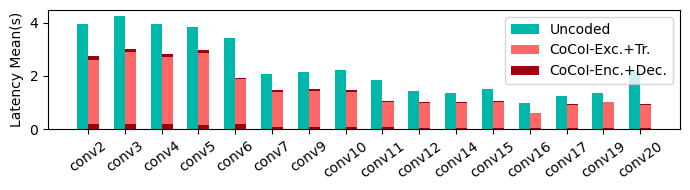

In [46]:
# resnet

# Results of single method:
# 'uncoded': {'min':35.95118260383606, 'mean':38.821889257431025, 'max':43.374011278152466}
# Distributed conv idxes: [3, 6, 10, 13, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# 'coded': {'min':26.121575117111206, 'mean':27.21944353580475, 'max':29.474100828170776}
# Distributed conv idxes: [3, 6, 10, 13, 17, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# Results of mixed method:
# Layer 0: [1.15400345 1.16426086]
# Layer 3: [3.93347588 2.738574  ]
# Layer 6: [4.26350448 3.02578499]
# Layer 10: [3.93176866 2.84057057]
# Layer 13: [3.84256375 2.98699586]
# Layer 17: [3.40525787 1.93755958]
# Layer 20: [2.07643938 1.46181839]
# Layer 22: [3.16093497 1.68938534]
# Layer 26: [2.12983687 1.49020419]
# Layer 29: [2.20985062 1.47242801]
# Layer 33: [1.84424572 1.05410826]
# Layer 36: [1.43981268 1.018454  ]
# Layer 38: [1.42781413 0.88150167]
# Layer 42: [1.36404684 1.02061701]
# Layer 45: [1.50960581 1.05954237]
# Layer 49: [0.97198505 0.61363304]
# Layer 52: [1.23806171 0.93644528]
# Layer 54: [0.4705004 0.3165086]
# Layer 58: [1.34570041 1.01293635]
# Layer 61: [2.18804004 0.93557   ]
# Conv latency: [0.31938815116882324, 2.738574004173279, 3.025784993171692, 2.840570569038391, 2.9869958639144896, 1.9375595808029176, 1.4618183851242066, 0.3371391296386719, 1.4902041912078858, 1.4724280118942261, 1.0541082620620728, 1.0184540033340455, 0.3606750965118408, 1.0206170082092285, 1.0595423698425293, 0.6136330366134644, 0.9364452838897706, 0.3165086030960083, 1.0129363536834717, 0.9355700016021729]
# Hybrid minimum of mean layer latency: 27.21944353580475

resnet18_datas = np.asarray([[1.15400345, 1.16426086],
        [3.93347588, 2.738574  ],
        [4.26350448, 3.02578499],
        [3.93176866, 2.84057057],
        [3.84256375, 2.98699586],
        [3.40525787, 1.93755958],
        [2.07643938, 1.46181839],
        [3.16093497, 1.68938534],
        [2.12983687, 1.49020419],
        [2.20985062, 1.47242801],
        [1.84424572, 1.05410826],
        [1.43981268, 1.018454  ],
        [1.42781413, 0.88150167],
        [1.36404684, 1.02061701],
        [1.50960581, 1.05954237],
        [0.97198505, 0.61363304],
        [1.23806171, 0.93644528],
        [0.4705004, 0.3165086],
        [1.34570041, 1.01293635],
        [2.18804004, 0.93557   ]])
# Conv latency: [0.31938815116882324, 2.738574004173279, 3.025784993171692, 2.840570569038391, 2.9869958639144896, 1.9375595808029176, 1.4618183851242066, 0.3371391296386719, 1.4902041912078858, 1.4724280118942261, 1.0541082620620728, 1.0184540033340455, 0.3606750965118408, 1.0206170082092285, 1.0595423698425293, 0.6136330366134644, 0.9364452838897706, 0.3165086030960083, 1.0129363536834717, 0.9355700016021729]

resnet18_distributed_conv = resnet18_datas[distributed_conv_idxes_resnet18]
resnet18_uncoded = resnet18_distributed_conv[:, 0]
resnet18_coded = resnet18_distributed_conv[:, 1]

xs = np.arange(len(x_labels_resnet18))

plt.figure(figsize=figure_size)
plt.bar(xs-width/2, resnet18_uncoded, width=width, label=legends[0], color=colors[-2])
plt.bar(xs+width/2, resnet18_coded-resnet18_encoding-resnet18_decoding, width=width, bottom=resnet18_encoding, label=legends[1], color=colors[-1])
plt.bar(xs+width/2, resnet18_encoding, width=width, label=legends[2], color=colors[0])
plt.bar(xs+width/2, resnet18_decoding, width=width, bottom=resnet18_coded-resnet18_decoding, color=colors[0])
plt.xticks(xs, x_labels_resnet18, rotation=36)
plt.ylabel('Latency Mean(s)')
plt.legend()
plt.tight_layout()


Lambda_tr=5

In [47]:
# vgg16

# Results of single method:
# 'uncoded': {'min':10.462829113006592, 'mean':13.020755910873412, 'max':17.52092170715332}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# Results of mixed method:
# Layer 0: [1.14672854]
# Layer 1: [2.91691563]
# Layer 3: [0.89629271]
# Layer 4: [1.44220943]
# Layer 6: [0.6371089]
# Layer 7: [1.02577202]
# Layer 8: [0.9684552]
# Layer 10: [0.37789953]
# Layer 11: [1.45208387]
# Layer 12: [1.06330509]
# Layer 14: [0.69581649]
# Layer 15: [0.62930453]
# Layer 16: [0.57080181]
# Conv latency: [0.319610595703125, 2.9169156312942506, 0.8962927103042603, 1.4422094345092773, 0.6371088981628418, 1.0257720232009888, 0.9684551954269409, 0.37789952754974365, 1.4520838737487793, 1.0633050918579101, 0.6958164930343628, 0.6293045282363892, 0.5708018064498901]
# Hybrid minimum of mean layer latency: 13.020755910873412

# Results of single method:
# 'coded-3': {'min':12.541972637176514, 'mean':13.912313556671142, 'max':17.13097310066223}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded-2': {'min':11.231176614761353, 'mean':13.020046067237855, 'max':17.54778528213501}
# Distributed conv idxes: [3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded-1': {'min':10.767643928527832, 'mean':12.344562005996703, 'max':15.609242916107178}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# Results of mixed method:
# Layer 0: [1.59936364 1.39380593 1.23250821]
# Layer 1: [3.15691602 3.34462028 2.78443613]
# Layer 3: [1.04750681 0.95918446 0.90960662]
# Layer 4: [1.96311793 1.63583505 1.50803592]
# Layer 6: [0.63900056 0.59240839 0.52150009]
# Layer 7: [1.06401682 0.98320808 1.02825592]
# Layer 8: [1.00065207 0.97310905 0.96847241]
# Layer 10: [0.48980572 0.43256755 0.46800973]
# Layer 11: [1.2073422  1.08335698 1.1158236 ]
# Layer 12: [1.20793755 1.09450438 1.0469054 ]
# Layer 14: [0.59750338 0.53360395 0.54029686]
# Layer 15: [0.59390526 0.5323565  0.54282856]
# Layer 16: [0.59981854 0.51050069 0.56560006]
# Conv latency: [0.319610595703125, 2.7844361305236816, 0.9096066236495972, 1.508035922050476, 0.5215000867843628, 0.9832080841064453, 0.9684724092483521, 0.43256754875183107, 1.0833569765090942, 1.0469053983688354, 0.5336039543151856, 0.5323565006256104, 0.510500693321228]
# Hybrid minimum of mean layer latency: 12.159341025352479

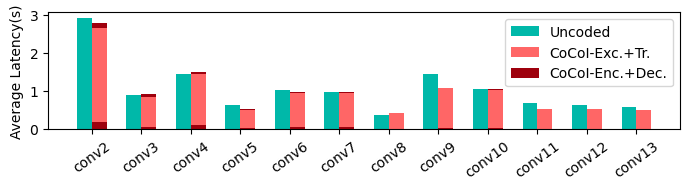

In [48]:
vgg16_uncoded = np.asarray([[1.14672854],
                [2.91691563],
                [0.89629271],
                [1.44220943],
                [0.6371089],
                [1.02577202],
                [0.9684552],
                [0.37789953],
                [1.45208387],
                [1.06330509],
                [0.69581649],
                [0.62930453],
                [0.57080181]])
vgg16_uncoded = vgg16_uncoded[1:, 0]
vgg16_coded = np.asarray([[1.59936364, 1.39380593, 1.23250821],
                [3.15691602, 3.34462028, 2.78443613],
                [1.04750681, 0.95918446, 0.90960662],
                [1.96311793, 1.63583505, 1.50803592],
                [0.63900056, 0.59240839, 0.52150009],
                [1.06401682, 0.98320808, 1.02825592],
                [1.00065207, 0.97310905, 0.96847241],
                [0.48980572, 0.43256755, 0.46800973],
                [1.2073422,  1.08335698, 1.1158236 ],
                [1.20793755, 1.09450438, 1.0469054 ],
                [0.59750338, 0.53360395, 0.54029686],
                [0.59390526, 0.5323565,  0.54282856],
                [0.59981854, 0.51050069, 0.56560006]])
vgg16_coded = vgg16_coded[1:].min(axis=1)
plt.figure(figsize=figure_size)
xs = np.arange(len(x_labels_vgg16))
# colors = ['#A0A0A0', '#00b8a9', '#FF6666']  # only for distributed methods except local
plt.bar(xs-width/2, vgg16_uncoded, width=width, label=legends[0], color=colors[-2])
plt.bar(xs+width/2, vgg16_coded-vgg16_encoding-vgg16_decoding, width=width, bottom=vgg16_encoding, label=legends[1], color=colors[-1])
plt.bar(xs+width/2, vgg16_encoding, width=width, label=legends[2], color=colors[0])
plt.bar(xs+width/2, vgg16_decoding, width=width, bottom=vgg16_coded-vgg16_decoding, color=colors[0])
plt.xticks(xs, x_labels_vgg16, rotation=36)
plt.ylabel('Average Latency(s)')
plt.legend()
plt.tight_layout()
plt.savefig('figures/vgg16_layer_latency_lambda5.pdf', bbox_inches='tight')


In [49]:
# resnet18

# Results of single method:
# 'uncoded': {'min':22.939070463180542, 'mean':29.673278427124032, 'max':40.07946252822876}
# Distributed conv idxes: [3, 6, 10, 13, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# Results of mixed method:
# Layer 0: [1.16513016]
# Layer 3: [3.03584316]
# Layer 6: [3.08242805]
# Layer 10: [2.64022346]
# Layer 13: [3.02345757]
# Layer 17: [2.28777936]
# Layer 20: [1.50312059]
# Layer 22: [1.91162326]
# Layer 26: [1.61271179]
# Layer 29: [1.63273256]
# Layer 33: [1.15442586]
# Layer 36: [1.10446279]
# Layer 38: [0.93001587]
# Layer 42: [1.13190782]
# Layer 45: [1.10290368]
# Layer 49: [0.64402168]
# Layer 52: [1.3872252]
# Layer 54: [0.29670248]
# Layer 58: [1.35891612]
# Layer 61: [1.37672327]
# Conv latency: [0.31938815116882324, 3.0358431577682494, 3.082428050041199, 2.6402234554290773, 3.02345757484436, 2.287779355049133, 1.5031205892562867, 0.3371391296386719, 1.612711787223816, 1.6327325582504273, 1.154425859451294, 1.1044627904891968, 0.3606750965118408, 1.1319078207015991, 1.10290367603302, 0.6440216779708863, 1.3872251987457276, 0.2967024803161621, 1.3589161157608032, 1.3767232656478883]
# Hybrid minimum of mean layer latency: 29.673278427124025

# Results of single method:
# 'coded-3': {'min':27.143795251846313, 'mean':30.734934425353998, 'max':36.666027784347534}
# Distributed conv idxes: [3, 6, 10, 13, 17, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# 'coded-2': {'min':25.186787605285645, 'mean':28.646327614784244, 'max':37.60231590270996}
# Distributed conv idxes: [3, 6, 10, 13, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# 'coded-1': {'min':23.983816146850586, 'mean':27.44223716259003, 'max':34.869022846221924}
# Distributed conv idxes: [3, 6, 10, 13, 17, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# Results of mixed method:
# Layer 0: [1.58142233 1.40942945 1.22560921]
# Layer 3: [3.15212934 3.00960469 3.03403318]
# Layer 6: [3.28334072 2.74254353 2.72665231]
# Layer 10: [3.25161314 2.73232114 2.58852658]
# Layer 13: [2.97744586 2.91363263 2.55282915]
# Layer 17: [2.21232245 2.22494645 1.99694078]
# Layer 20: [1.68912513 1.69791925 1.4071188 ]
# Layer 22: [2.80673299 2.19743288 1.82339876]
# Layer 26: [1.65141273 1.68040013 1.44119978]
# Layer 29: [1.75890059 1.58971803 1.4564379 ]
# Layer 33: [1.33891618 1.23280091 1.17275469]
# Layer 36: [1.11016214 1.07170854 1.10169613]
# Layer 38: [1.23260698 1.10361862 1.31351936]
# Layer 42: [1.16711636 1.12150099 1.09369953]
# Layer 45: [1.09280224 1.0738059  1.04440248]
# Layer 49: [0.83360031 0.758939   0.81828623]
# Layer 52: [1.19567513 1.05451868 1.16292639]
# Layer 54: [0.54461596 0.41654351 0.39970005]
# Layer 58: [1.17940557 1.06040545 1.08347368]
# Layer 61: [1.19930489 1.03990064 1.11959791]
# Conv latency: [0.31938815116882324, 3.0096046924591064, 2.7266523122787474, 2.5885265827178956, 2.552829146385193, 1.9969407796859742, 1.407118797302246, 0.3371391296386719, 1.441199779510498, 1.45643789768219, 1.172754693031311, 1.0717085361480714, 0.3606750965118408, 1.0936995267868042, 1.0444024801254272, 0.758939003944397, 1.0545186758041383, 0.34396862983703613, 1.060405445098877, 1.0399006366729737]
# Hybrid minimum of mean layer latency: 27.117300629615787

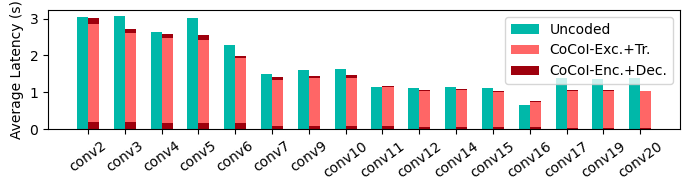

In [50]:
resnet18_uncoded = np.asarray([[1.16513016],
                    [3.03584316],
                    [3.08242805],
                    [2.64022346],
                    [3.02345757],
                    [2.28777936],
                    [1.50312059],
                    [1.91162326],
                    [1.61271179],
                    [1.63273256],
                    [1.15442586],
                    [1.10446279],
                    [0.93001587],
                    [1.13190782],
                    [1.10290368],
                    [0.64402168],
                    [1.3872252],
                    [0.29670248],
                    [1.35891612],
                    [1.37672327]])
resnet18_uncoded = resnet18_uncoded[:, 0][distributed_conv_idxes_resnet18]
resnet18_coded = np.asarray([[1.58142233, 1.40942945, 1.22560921],
                    [3.15212934, 3.00960469, 3.03403318],
                    [3.28334072, 2.74254353, 2.72665231],
                    [3.25161314, 2.73232114, 2.58852658],
                    [2.97744586, 2.91363263, 2.55282915],
                    [2.21232245, 2.22494645, 1.99694078],
                    [1.68912513, 1.69791925, 1.4071188 ],
                    [2.80673299, 2.19743288, 1.82339876],
                    [1.65141273, 1.68040013, 1.44119978],
                    [1.75890059, 1.58971803, 1.4564379 ],
                    [1.33891618, 1.23280091, 1.17275469],
                    [1.11016214, 1.07170854, 1.10169613],
                    [1.23260698, 1.10361862, 1.31351936],
                    [1.16711636, 1.12150099, 1.09369953],
                    [1.09280224, 1.0738059,  1.04440248],
                    [0.83360031, 0.758939,   0.81828623],
                    [1.19567513, 1.05451868, 1.16292639],
                    [0.54461596, 0.41654351, 0.39970005],
                    [1.17940557, 1.06040545, 1.08347368],
                    [1.19930489, 1.03990064, 1.11959791]])
resnet18_coded = resnet18_coded[distributed_conv_idxes_resnet18].min(axis=1)

xs = np.arange(len(x_labels_resnet18))

plt.figure(figsize=figure_size)
plt.bar(xs-width/2, resnet18_uncoded, width=width, label=legends[0], color=colors[-2])
plt.bar(xs+width/2, resnet18_coded-resnet18_encoding-resnet18_decoding, width=width, bottom=resnet18_encoding, label=legends[1], color=colors[-1])
plt.bar(xs+width/2, resnet18_encoding, width=width, label=legends[2], color=colors[0])
plt.bar(xs+width/2, resnet18_decoding, width=width, bottom=resnet18_coded-resnet18_decoding, color=colors[0])
plt.xticks(xs, x_labels_resnet18, rotation=36)
plt.ylabel('Average Latency (s)')
plt.legend()
plt.tight_layout()
plt.savefig('figures/resnet_layer_latency_lambda5.pdf', bbox_inches='tight')